<a href="https://colab.research.google.com/github/Seife1/PRODIGY_ML_01/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prices Prediction - Linear  Regression Techniques**

## **Data Overview**

The data is extracted and aggregated from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data. Each row in the data contains the values for Sale price, Type of road access, Number of bedrooms, Year built, garage location and so on.

## **Imports and Reading Data**

In [1]:
# Import Essentials Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Miscs
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Models
from sklearn.linear_model import LinearRegression

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Set Kaggle Configuration: To direct Kaggle to the appropriate directory in Drive
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [7]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 59.2MB/s]


In [8]:
import zipfile

# Define the path to your zip file
file_path = '/content/house-prices-advanced-regression-techniques.zip'

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

In [9]:
train_df = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv')

Our next focus will be on understanding, exploring, and analyzing this dataset.

## **Data Understanding**

In [10]:
train_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [11]:
# Shape or size of the datasets
print(f'Datasets shape: {train_df.shape}')

Datasets shape: (1460, 81)


In [12]:
# Data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [14]:
numerical_features = list(train_df.select_dtypes(include=['float64', 'int64']).columns)
print(numerical_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [15]:
categorical_features = list(train_df.select_dtypes(include=['object']).columns)
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [16]:
# Statistics of our datasets
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## **Data Preparation**

In [17]:
# Checking for Duplicates
# train_df.drop_duplicates(inplace=True)
# columns
duplicated_columns = train_df.columns[train_df.columns.duplicated()]
if len(duplicated_columns) > 0:
    print(f"Duplicate columns found: {', '.join(duplicated_columns)}")
else:
    print("No duplicate columns found.")

No duplicate columns found.


In [18]:
#rows
duplicated_rows = train_df[train_df.duplicated()]
if len(duplicated_rows) > 0:
    print(f"Duplicate rows found: {len(duplicated_rows)}")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [19]:
# Checking for missing values
missing_values = train_df.isnull().sum()

# list columns with missing values only
missing_columns = missing_values[missing_values > 0]
missing_categorical_columns = missing_columns[missing_columns.index.isin(categorical_features)]
missing_numerical_columns = missing_columns[missing_columns.index.isin(numerical_features)]

print("Missing Categorical Columns:")
print("============================")
print(missing_categorical_columns)

print("\nMissing Numerical Columns:")
print("============================")
print(missing_numerical_columns)

Missing Categorical Columns:
Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Missing Numerical Columns:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


<Axes: >

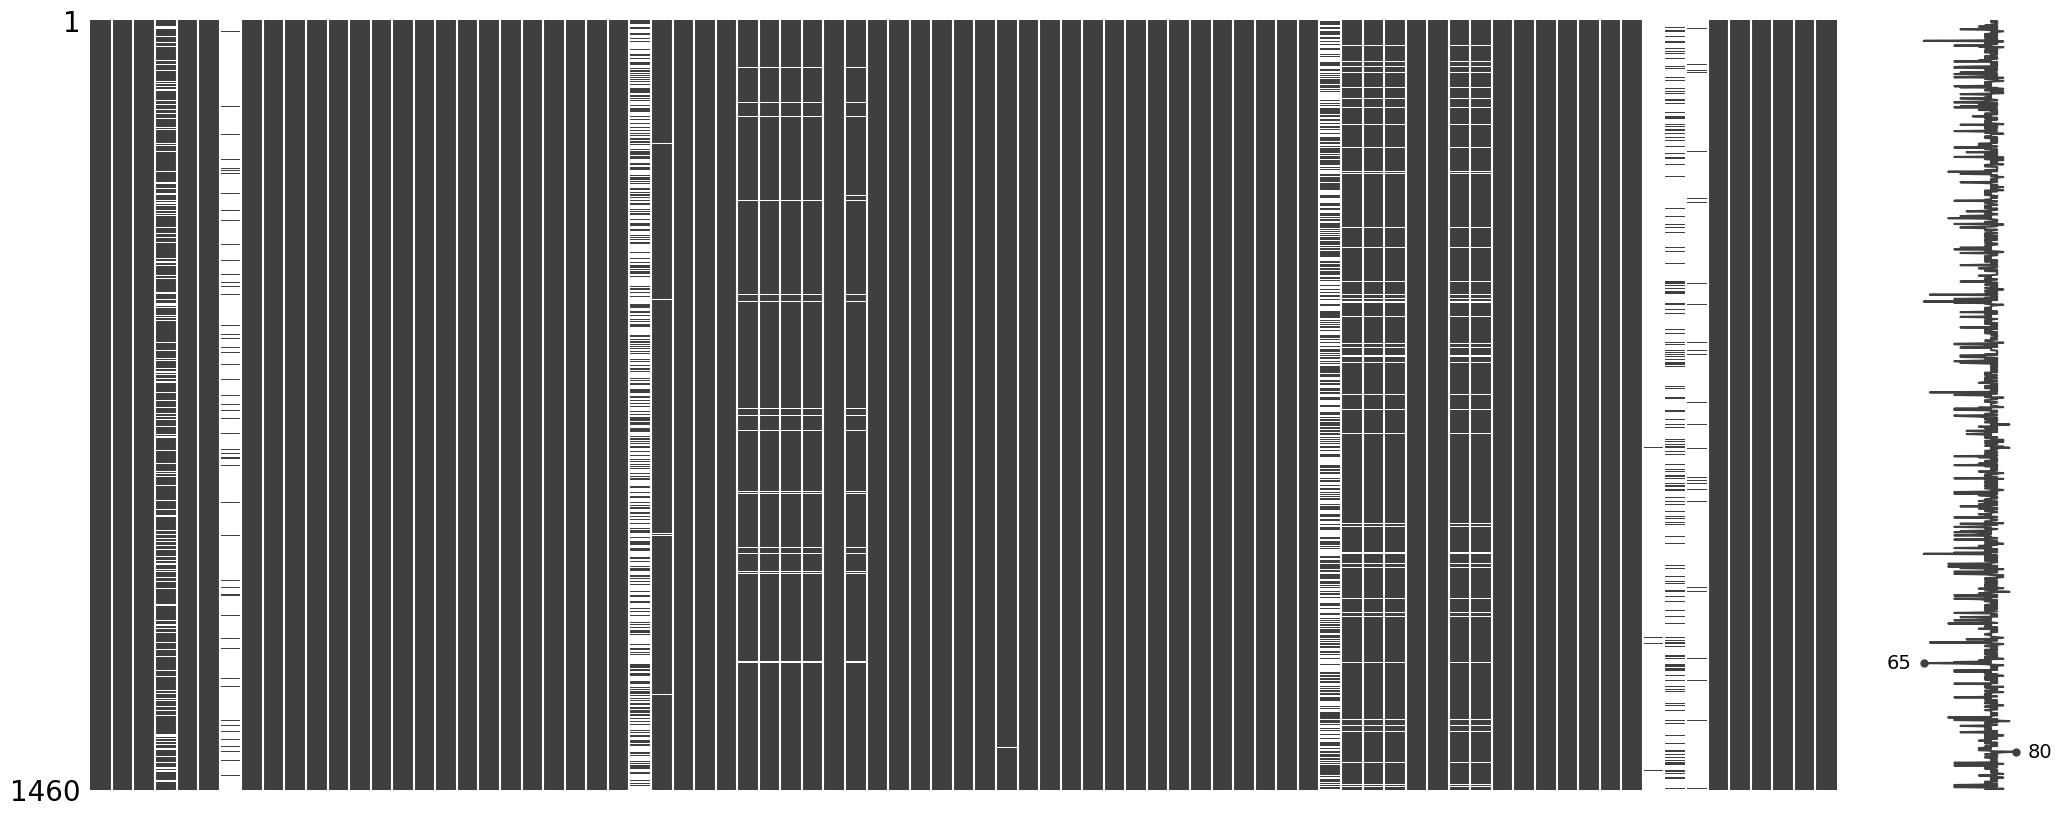

In [20]:
# Visualizing missing data patterns
import missingno as msno
msno.matrix(train_df)

As you can see from the vissualizer the dataset has some  white spaces in few columns, So I would like to replace the missing values by mean and most frequent values for the quantitative and qualitative data respectively.

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
missing_categorical_columns_list = (missing_categorical_columns).index.tolist()

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(train_df[missing_categorical_columns_list])
train_df[missing_categorical_columns_list] = imputer.transform(train_df[missing_categorical_columns_list])

In [23]:
missing_numerical_columns_list = (missing_numerical_columns).index.tolist()

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train_df[missing_numerical_columns_list])
train_df[missing_numerical_columns_list] = imputer.transform(train_df[missing_numerical_columns_list])

<Axes: >

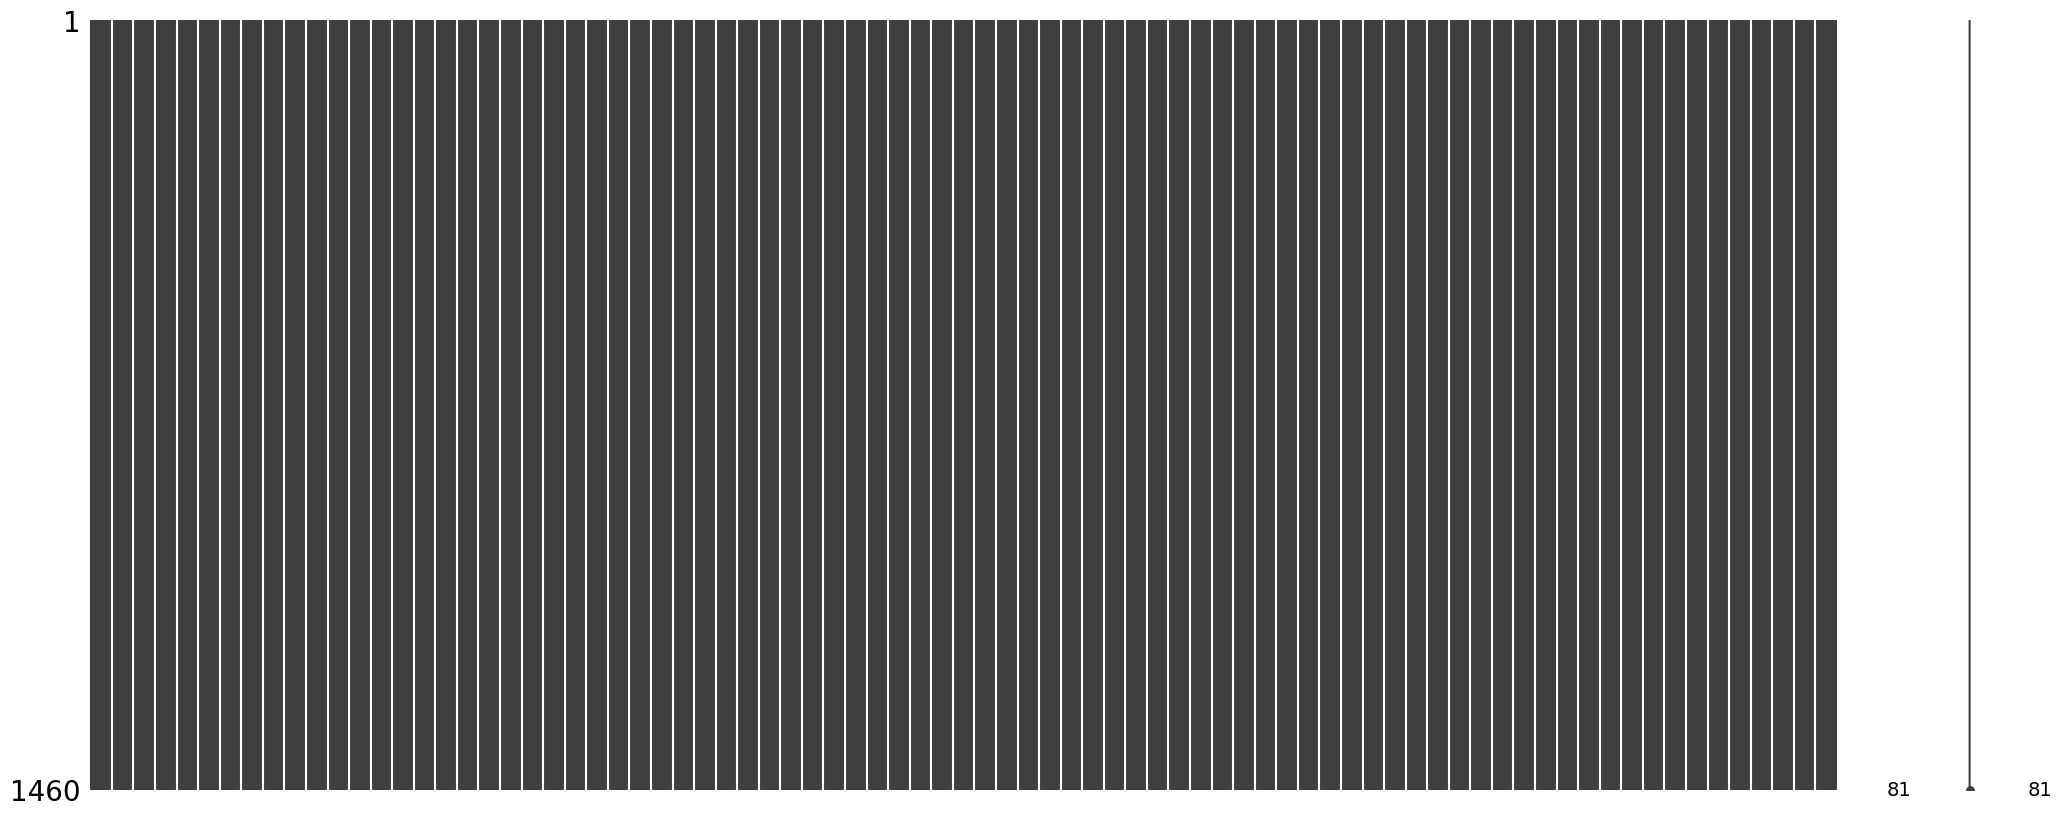

In [24]:
msno.matrix(train_df)

### **One Hot Encoder**

In [25]:
# Encode the categorical columns
dummies_df = pd.get_dummies(train_df[categorical_features], drop_first=True)

# Concatenate the encoded columns with the orginal dataset
train_df = pd.concat([train_df, dummies_df], axis=1)

# Drop the original categorical columns
train_df.drop(categorical_features, axis=1, inplace=True)

# Output the modified dataset
train_df.head(10)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60    65.000000     8450            7            5       2003   
1   2          20    80.000000     9600            6            8       1976   
2   3          60    68.000000    11250            7            5       2001   
3   4          70    60.000000     9550            7            5       1915   
4   5          60    84.000000    14260            8            5       2000   
5   6          50    85.000000    14115            5            5       1993   
6   7          20    75.000000    10084            8            5       2004   
7   8          60    70.049958    10382            7            6       1973   
8   9          50    51.000000     6120            7            5       1931   
9  10         190    50.000000     7420            5            6       1939   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   
5          1995         0.0         732  ...           False           False   
6          2005       186.0        1369  ...           False           False   
7          1973       240.0         859  ...           False           False   
8          1950         0.0           0  ...           False           False   
9          1950         0.0         851  ...           False           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0         False         False         True                  False   
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                  False   
4         False         False         True                  False   
5         False         False         True                  False   
6         False         False         True                  False   
7         False         False         True                  False   
8         False         False         True                  False   
9         False         False         True                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                  True   
5                 False                 False                  True   
6                 False                 False                  True   
7                 False                 False                  True   
8                 False                 False                 False   
9                 False                 False                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
5                  False  
6                  False  
7                  False  
8                  False  
9                  False  

[10 rows x 246 columns]

In [26]:
# We will drop the Id column as it is not necessary for model training.
train_df = train_df.drop('Id', axis=1)

### **Feature Understanding**

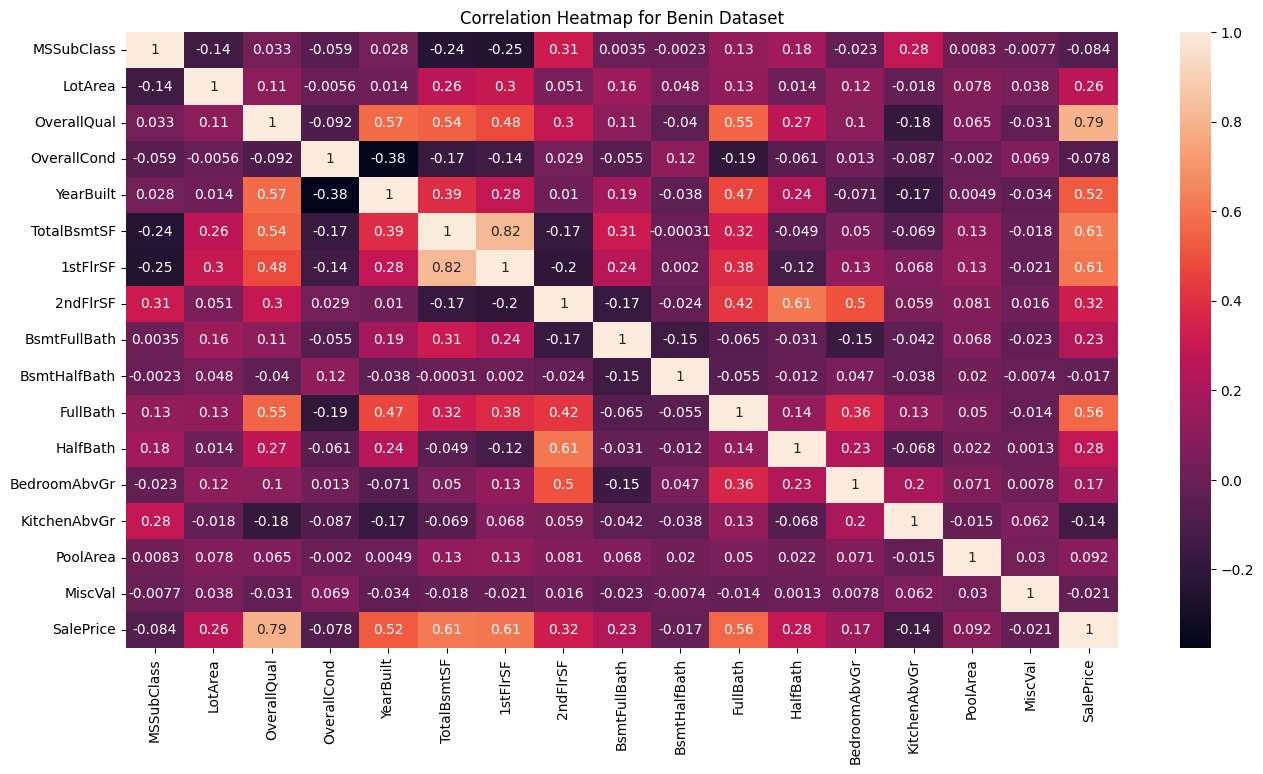

In [27]:
# Visuallizing correlation with heatmaps

# Select only numeric columns for correlation calculation
numerical_features = train_df[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'PoolArea', 'MiscVal', 'SalePrice']]

plt.figure(figsize=(16, 8))
sns.heatmap(numerical_features.corr(), annot=True)
plt.title('Correlation Heatmap for Benin Dataset')
plt.show()

The correlation coefficient is a value between -1 and 1 which indicates the strength and direction of the relationship between two feature from our columns. So A value close to 1(white) indicates close relationship, a value close to -1 indicates a strong negative relationship, a value close to zero represent no relationship.

As you can see from the heatmap of the above Sale price have almost strong relationship with Overall quality and secondly with Total squarefit of basement area and First floor square fit.

<Axes: xlabel='SalePrice', ylabel='Density'>

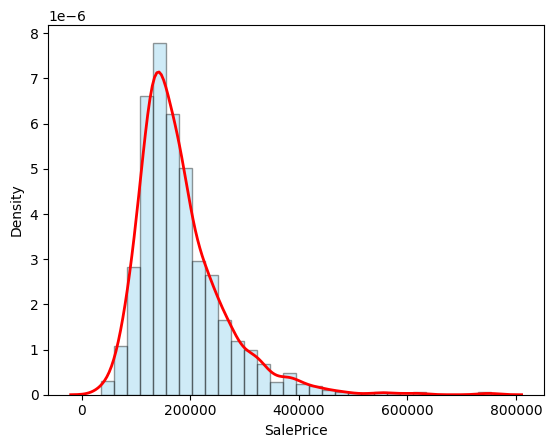

In [28]:
# Sales price density
sns.distplot(train_df['SalePrice'], hist=True, kde=True,
             bins=30, color='skyblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'color':'red', 'linewidth': 2})


The plot above is a distribution plot of the ***SalePrice*** variable from a  dataset, which typically represents the distribution of house prices. The house prices are mostly between $150,000$ and $200,000$, with a right-skewed distribution showing fewer high-priced properties up to $800,000$.

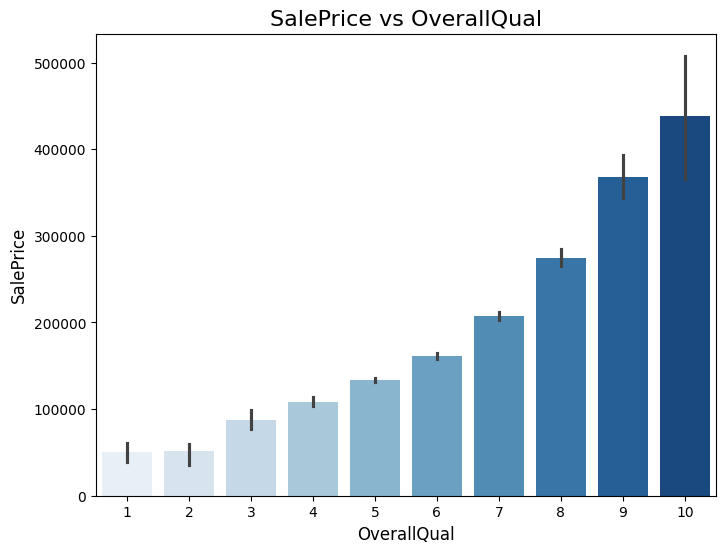

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=train_df['OverallQual'], y=train_df['SalePrice'], palette='Blues')
plt.xlabel('OverallQual', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title('SalePrice vs OverallQual', fontsize=16)

plt.show()


The bar plot you provided shows the relationship between **SalePrice** and **OverallQual** (Overall Quality). Higher OverallQual significantly increases SalePrice, with a strong positive correlation and more consistent pricing in higher quality homes.

The gradual shift from light to dark shades makes it easier to follow the trend and emphasizes the continuous increase in price with quality.

The black lines on top of each bar represent the error bars, indicating the variability or standard deviation of SalePrice within each OverallQual category.

**Identifying Outliers with Box Plots**

Box plots are a great way to identify outliers in your data. An outlier is a value that is significantly different from the other values.

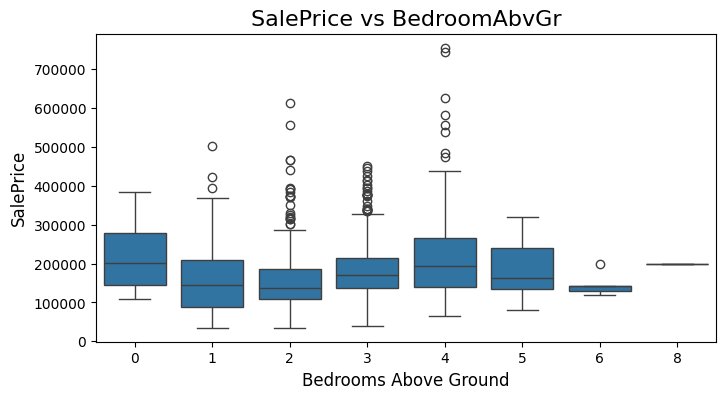

In [30]:
# SalePrice Vs BedroomAbvGr
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_df['BedroomAbvGr'], y=train_df['SalePrice'])
plt.xlabel('Bedrooms Above Ground', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title('SalePrice vs BedroomAbvGr', fontsize=16)

plt.show()

The box in each box plot represents the interquartile range (the range between the 25th and 75th percentiles), the line inside the box represents the median, and the dots outside the box represent outliers.

In [31]:
# Replacing outliers with the median is generally a good approach because it is less sensitive to extreme values than the mean.
# This helps to preserve the overall distribution of the data while still addressing the issue of outliers.

numeric_df = train_df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop('SalePrice', axis=1)
# Iterate over the columns of the DataFrame & Calculate the IQR (Interquartile Range)
for column in numeric_df.columns:
  Q1 = numeric_df[column].quantile(0.25)
  Q3 = numeric_df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define the outlier boundaries
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Calculate the median of the column column
  median_ghi = numeric_df[column].median()

  # Identify outliers
  outliers_train = (numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)
  print(f"Number of outliers in {column}: {outliers_train.sum()}")

  # Replace outliers with the median
  numeric_df[column] = np.where(outliers_train, median_ghi, numeric_df[column])
  outliers_train_after = (numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)
  print(f"Number of outliers in {column} after replacement: {outliers_train_after.sum()}")
  print()

Number of outliers in MSSubClass: 103
Number of outliers in MSSubClass after replacement: 0

Number of outliers in LotFrontage: 106
Number of outliers in LotFrontage after replacement: 0

Number of outliers in LotArea: 69
Number of outliers in LotArea after replacement: 0

Number of outliers in OverallQual: 2
Number of outliers in OverallQual after replacement: 0

Number of outliers in OverallCond: 125
Number of outliers in OverallCond after replacement: 0

Number of outliers in YearBuilt: 7
Number of outliers in YearBuilt after replacement: 0

Number of outliers in YearRemodAdd: 0
Number of outliers in YearRemodAdd after replacement: 0

Number of outliers in MasVnrArea: 98
Number of outliers in MasVnrArea after replacement: 0

Number of outliers in BsmtFinSF1: 7
Number of outliers in BsmtFinSF1 after replacement: 0

Number of outliers in BsmtFinSF2: 167
Number of outliers in BsmtFinSF2 after replacement: 0

Number of outliers in BsmtUnfSF: 29
Number of outliers in BsmtUnfSF after repl

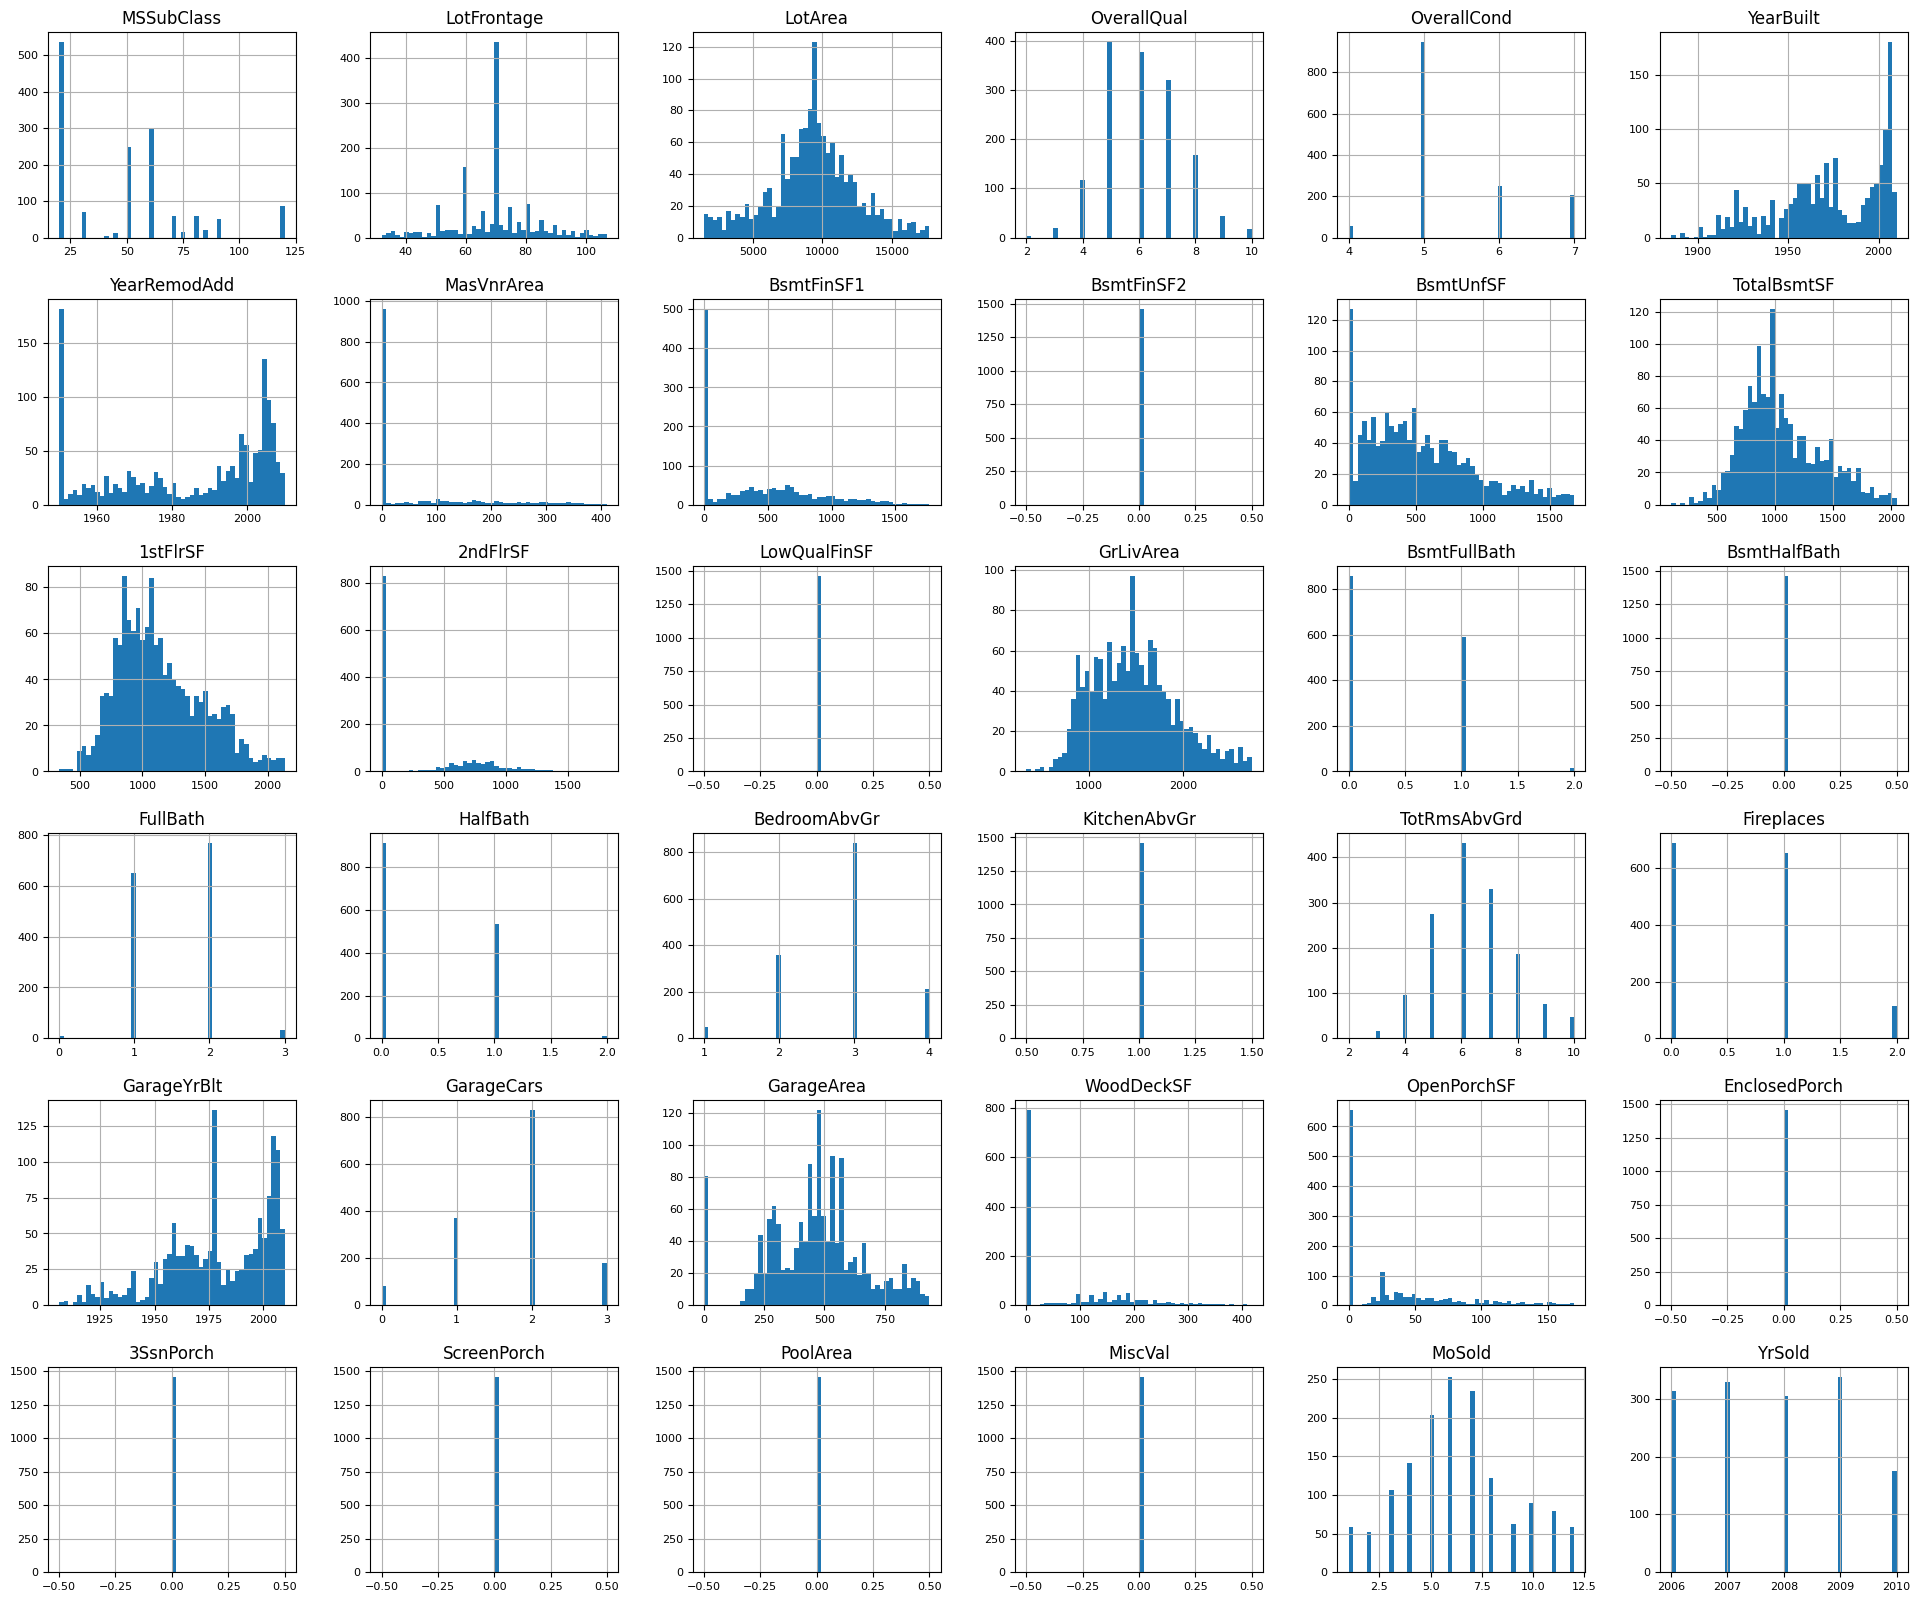

In [32]:
# Now let us plot the distribution for all the numerical features.
numeric_df.hist(figsize=(24, 20), bins=50, xlabelsize=8, ylabelsize=8);

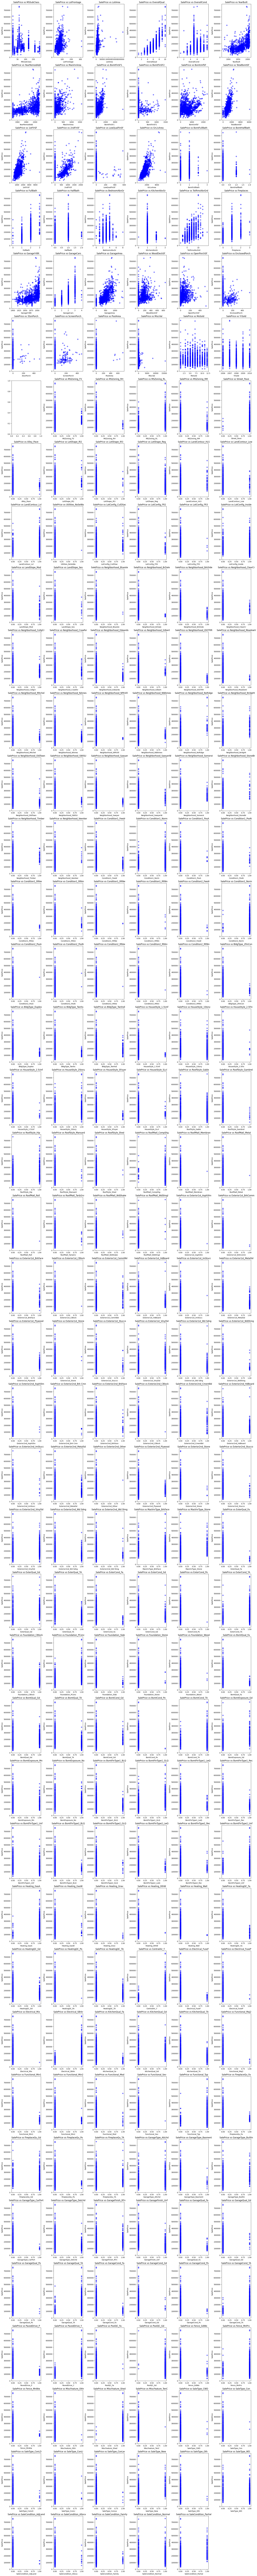

In [33]:
# Number of features (excluding the last column, which is SalePrice)
num_features = len(train_df.columns[:-1])

# Set the number of columns for the subplot grid (adjustable)
num_cols = 6
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Set up the figure with an appropriate size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), constrained_layout=True)

# Loop through each feature and plot
for i, label in enumerate(train_df.columns):
    if label == 'SalePrice':
      continue
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.scatter(train_df[label], train_df['SalePrice'], color='blue', alpha=0.5)
    ax.set_xlabel(label, fontsize=10)
    ax.set_ylabel('SalePrice', fontsize=10)
    ax.set_title(f'SalePrice vs {label}', fontsize=12)

# Hide any unused subplots if the number of plots isn't a perfect multiple of num_cols
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

**Notice** that the *SalePrice* doesn't appear linear with respect to some of these features

So far so good, we have finished our cleaning and feature understanding **(EDA)** for NOW!!

Let's proceed to the next step

### **Pre-Processing Steps for Machine Learning**

In [34]:
# Here we are differentiate the feature input and predictions
# let say X is feature input and y is the predictions

X = train_df.drop(["SalePrice"], axis=1)
y = train_df["SalePrice"]

In [35]:
# split the data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Train the model
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Evaluate the model

y_pred = model.predict(X_test)

# Use regression metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Model Score: {r2_score(y_test, y_pred)}")

accuracy = model.score(X_test, y_test)
print("Accuracy percentage: ", accuracy * 100, "%")

Mean Squared Error: 2640371100.532824
Model Score: 0.6557680821894138
Accuracy percentage:  65.57680821894138 %


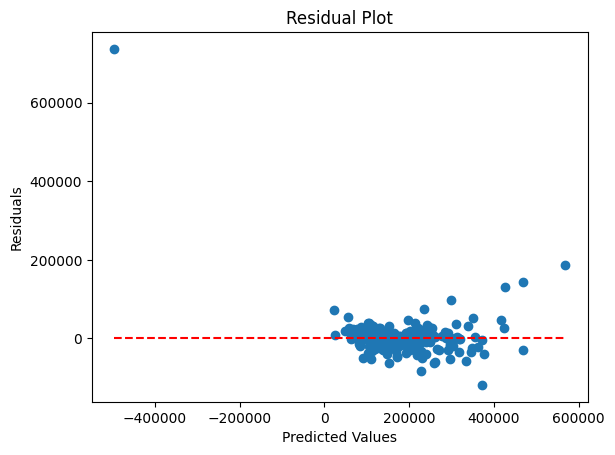

In [38]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residual plot shows residuals on the y-axis and predicted values on the x-axis. Most residuals are centered around the zero line, indicating that the model's predictions are generally unbiased. However, there is a significant outlier, suggesting that the model may not fit all data points well. The spread of residuals, especially for higher predicted values, may indicate potential issues with model accuracy for certain predictions.

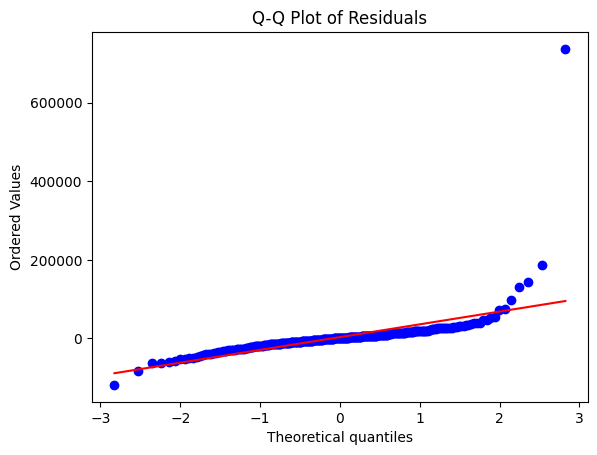

In [39]:
import scipy.stats as stats

# Q-Q plot to check the normality of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

The Q-Q plot shows that most residuals follow a normal distribution, but the significant deviation at the upper right suggests potential outliers or non-normality in the residuals.